In [2]:
import pandas as pd

filename = 'gd1_candidates.hdf5'
candidate_df = pd.read_hdf(filename, 'candidate_df')

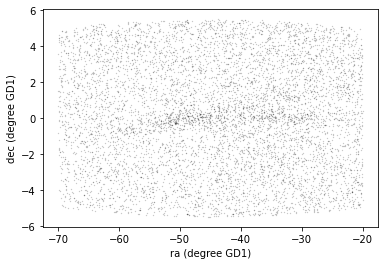

In [3]:
import matplotlib.pyplot as plt

x = candidate_df['phi1']
y = candidate_df['phi2']

plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.xlabel('ra (degree GD1)')
plt.ylabel('dec (degree GD1)');